# Geometry, shapes and collision checking

We first have to get some administration out of the way.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import acrobotics as ab
import matplotlib.pyplot as plt
from acrolib.plotting import get_default_axes3d, plot_reference_frame
from acrolib.geometry import pose_z

## Shapes

Shapes are geometric objects to represent robots or other things in the planning environment.
You can use them for:

- Visualization: A shape has a **plot** function to display them as a wireframe in matplotlib axes.
- Collision checking: A shape has a **is_in_collision** function to check if they collide with other shapes.
- Representation: One can get different aspects of a shape such as the vertices or edges.
  These are used for plotting but are also useful for optimization algorithms for example.

In the current version only boxes are implemented.

## Shape position and orientation

**A shape has no inherent position!** To get something useful from a shape, you have to supply the position and orientation (in one word, the pose). The pose of a shape is expected as a homogeneous transform matrix.
For example, if I want all the edges of a box of 1x2x2, with the box at the origin, I do:

In [10]:
box = ab.Box(1, 2, 2)
tf_identity = np.eye(4)
print(box.get_vertices(tf_identity))

[[-0.5  1.   1. ]
 [-0.5  1.  -1. ]
 [-0.5 -1.   1. ]
 [-0.5 -1.  -1. ]
 [ 0.5  1.   1. ]
 [ 0.5  1.  -1. ]
 [ 0.5 -1.   1. ]
 [ 0.5 -1.  -1. ]]


If I want the edges of the same box in a different position I give it a different transform.

In [11]:
tf = np.eye(4)
tf[2, 3] = 0.6

print(box.get_vertices(tf))

[[-0.5  1.   1.6]
 [-0.5  1.  -0.4]
 [-0.5 -1.   1.6]
 [-0.5 -1.  -0.4]
 [ 0.5  1.   1.6]
 [ 0.5  1.  -0.4]
 [ 0.5 -1.   1.6]
 [ 0.5 -1.  -0.4]]


See, the box moved! All other task handle shapes with this basic API.

We can have a look at the shape. The module `acrolib.plotting` (`pip install acrolib`) has a convenience fucntion to get 3d compatible matplotlib axes. **Notice** that we have to specify where to plot the box, a shape has no inherent position.

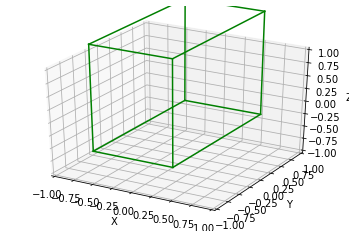

In [12]:
fig, ax = get_default_axes3d()
box.plot(ax, tf, c='green')

## Scene of shapes

Most objects are more complicated that just a box.
Somethimes it is useful to associate a transform with a shape.
The two points are addressed by `Scenes`.
They group a list of shapes with a list of transforms. `pose_z(angle, x, y, z)` is a convenience function from `acrolib.geometry` to create a transform of a translation followd by rotation around the z-axis.

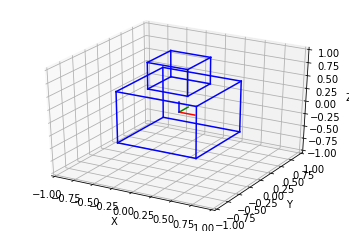

In [13]:
box1, tf1 = ab.Box(1, 1, 1), np.eye(4)
box2, tf2 = ab.Box(0.5, 0.5, 0.5), pose_z(0, 0, 0, 0.75)

happy_family = ab.Scene([box1, box2], [tf1, tf2])

fig, ax = get_default_axes3d()
happy_family.plot(ax, c='blue')
plot_reference_frame(ax)

Notice how the defaul pose of a shape is centered around the origin. We plot a default reference frame (identity transform) with `plot_reference_frame` from `acrolib.plotting`.